<a href="https://colab.research.google.com/github/nassim1014/Pytorch-DeepLearning-Tuto/blob/main/Pytorch_DeepLearning_Tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
2+2

4

In [2]:
import torch

Simple CNN model

In [ ]:
''' import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)  # Adjust based on the actual spatial dimensions

        self.fc2 = nn.Linear(256, 10)  # 10 output classes for example, change as needed

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)

        # Print the size before fc1
        print(x.size())

        x = x.view(x.size(0), -1)
        print(x.size())  # Print the size before fc1

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



# Download and prepare the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Initialize the CNN model
net = SimpleCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the CNN
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
 '''

what is a tensor : it s just like a list or a numpy array , when u do ML , u can use numpy array , when u use deep learning u use tensors . the diff is that they work better on GPU's (vs Regular CPU's)

In [3]:
import numpy as np

**Python Lists**

In [4]:
my_list = [[1,2,3,4],[7,8,5,1],[2,3,4,5]]
my_list

[[1, 2, 3, 4], [7, 8, 5, 1], [2, 3, 4, 5]]

**Numpy Array**

In [5]:
np1 = np.random.rand(3,4)
np1

array([[0.16465225, 0.11599807, 0.48178594, 0.35024613],
       [0.60573008, 0.17205632, 0.35898106, 0.2180264 ],
       [0.08668969, 0.24772585, 0.41176728, 0.22625599]])

**TENSORS**

In [6]:
tensor_2d= torch.randn(3,4)
tensor_2d

tensor([[-0.8901,  1.0064, -0.4546,  1.0742],
        [ 0.1537, -0.5080,  0.4037, -0.5236],
        [-0.5671,  0.0081,  0.6550,  1.3200]])

create tensor out of numpy array

In [7]:
torch.tensor(np1)

tensor([[0.1647, 0.1160, 0.4818, 0.3502],
        [0.6057, 0.1721, 0.3590, 0.2180],
        [0.0867, 0.2477, 0.4118, 0.2263]], dtype=torch.float64)

In [8]:
torch.zeros(3,4,2)

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

**Create Basic Neural Net with Pytorch**

In [9]:
# Using the Iris Data set containing Irs Flowers - The goal classify the flowers
# this model will just take an input move it to the hidden layers and to the output and that s it no complicated stuff
import torch.nn as nn
import torch.nn.functional as F


In [10]:
#Create a Model Class that inherits nn.Module. NB : u can use functionnal programming to get things done quickely but here we re using Object oriented Programming

class Model(nn.Module):
    # input Layer (4 features of the flower)
    #   --> Hidden layer1 (number of neuronnes)
    #        --> Hideen Layer2
    #               --> output (3 classes of iris flower)
    def __init__(self, in_features =4 ,h1 = 8, h2 =9 ,out_feature=3) :
        super().__init__()
        # we have 4 features describing the flowers
        # we want first hidden layer with 8 neuronnes and a second hidden layer with 9
        # out_feature = 3 bc we have 3 classes
        self.fc1 = nn.Linear(in_features, h1) # from input layer to h1
        # fc := fully connected
        self.fc2 = nn.Linear(h1, h2)  # from h1 to h2
        self.out = nn.Linear(h2, out_feature) # from h2 to output
    #create a funciton that moves things forward from layer to another
    def forward(self , x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x= self.out(x)

        return x




In [11]:
torch.manual_seed(41)
# Create an instance of our model
model = Model()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [14]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

In [16]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
# train test split
X = my_df.drop('species',axis=1).values
y = my_df['species'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=41)

In [22]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [23]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
# set the criterion of model to measure the error of how far off the predictions are
criterion = nn.CrossEntropyLoss()
#Choose an optimizer , in order to learn ,and learning rate lr (if error doesn't go down after a bunch of iterations (epochs), lower the lr)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
# model.parametres are fc1 , fc2 and output


In [27]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [38]:
#train model
# Epoch : one run thru the all the training data in our network
epochs = 100
losses = [] #see the evvolution of loss

for i in range((epochs)):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)
  #measure loss
  loss = criterion(y_pred, y_train)
  losses.append(loss) #.detach().numpy)

  #print every 10 epoch
  if i%10 ==0:
    print(f'Epoch {i} and loss {loss}')

  # Do some Backpropagation to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch 0 and loss 0.05286576226353645
Epoch 10 and loss 0.04508381709456444
Epoch 20 and loss 0.03979949280619621
Epoch 30 and loss 0.035970740020275116
Epoch 40 and loss 0.03293721750378609
Epoch 50 and loss 0.03041938506066799
Epoch 60 and loss 0.026795217767357826
Epoch 70 and loss 0.02338254824280739
Epoch 80 and loss 0.020531881600618362
Epoch 90 and loss 0.018495969474315643


In [39]:
losses

[tensor(0.0529, grad_fn=<NllLossBackward0>),
 tensor(0.0519, grad_fn=<NllLossBackward0>),
 tensor(0.0510, grad_fn=<NllLossBackward0>),
 tensor(0.0502, grad_fn=<NllLossBackward0>),
 tensor(0.0494, grad_fn=<NllLossBackward0>),
 tensor(0.0486, grad_fn=<NllLossBackward0>),
 tensor(0.0478, grad_fn=<NllLossBackward0>),
 tensor(0.0471, grad_fn=<NllLossBackward0>),
 tensor(0.0464, grad_fn=<NllLossBackward0>),
 tensor(0.0457, grad_fn=<NllLossBackward0>),
 tensor(0.0451, grad_fn=<NllLossBackward0>),
 tensor(0.0445, grad_fn=<NllLossBackward0>),
 tensor(0.0439, grad_fn=<NllLossBackward0>),
 tensor(0.0433, grad_fn=<NllLossBackward0>),
 tensor(0.0427, grad_fn=<NllLossBackward0>),
 tensor(0.0422, grad_fn=<NllLossBackward0>),
 tensor(0.0417, grad_fn=<NllLossBackward0>),
 tensor(0.0412, grad_fn=<NllLossBackward0>),
 tensor(0.0407, grad_fn=<NllLossBackward0>),
 tensor(0.0403, grad_fn=<NllLossBackward0>),
 tensor(0.0398, grad_fn=<NllLossBackward0>),
 tensor(0.0394, grad_fn=<NllLossBackward0>),
 tensor(0.

In [32]:
range(epochs)

range(0, 100)

RuntimeError: ignored

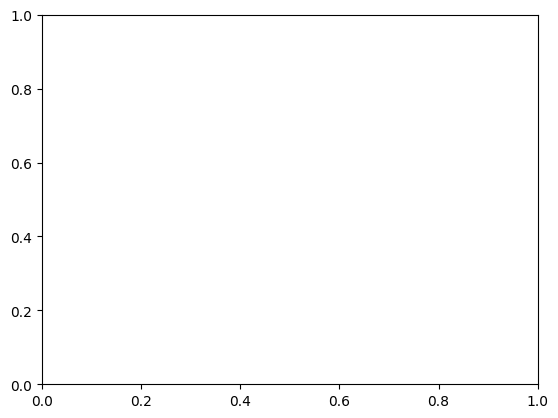

In [40]:
plt.plot( range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")